#1.1 Exploratory Data Analysis

In [ ]:
import pandas as pd
import numpy as np
import os

** 1.1 Exploratory Data Analysis**

In [ ]:
individual_data = pd.read_csv('../data/cases_train.csv')
individual_test = pd.read_csv('../data/cases_test.csv')

In [ ]:
individual_data['province'].value_counts()

Maharashtra       74894
Lima              29044
Tamil Nadu        25688
Gujarat           20585
Delhi             20254
                  ...  
Karaganda             1
Guelma                1
Abu Dhabi             1
Oita                  1
Warmia-Masuria        1
Name: province, Length: 1106, dtype: int64

In [ ]:
individual_data['country'].value_counts()

India          212411
Peru            57305
Germany         33009
Philippines     11521
Colombia        11464
                ...  
Azerbaijan          1
Qatar               1
Luxembourg          1
Reunion             1
Armenia             1
Name: country, Length: 131, dtype: int64

In [ ]:
individual_data['outcome'].value_counts()

nonhospitalized    150000
hospitalized       125000
recovered           88137
deceased             4499
Name: outcome, dtype: int64

In [ ]:
individual_data.head(5)

,age,sex,province,country,latitude,longitude,date_confirmation,additional_information,source,outcome
0,NaN,NaN,Delhi,India,28.614740,77.209100,26.05.2020,NaN,https://twitter.com/CMODelhi/status/1265203060...,recovered
1,NaN,NaN,Uttar Pradesh,India,25.436090,81.847180,20.05.2020,NaN,https://t.me/indiacovid/5222,hospitalized
2,NaN,NaN,Maharashtra,India,18.504220,73.853020,26.05.2020,NaN,https://t.me/indiacovid/5601,hospitalized
3,15-34,female,Baden-Wurttemberg,Germany,48.120860,7.849500,15.03.2020,NaN,NaN,nonhospitalized
4,NaN,NaN,Gujarat,India,23.188409,73.647122,20.05.2020,NaN,https://twitter.com/PIBAhmedabad/status/126311...,hospitalized


In [ ]:
location_data = pd.read_csv('../data/location.csv')

In [ ]:
location_data.head(5)

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,NaN,Afghanistan,2020-09-20 04:22:56,33.93911,67.709953,38919,1437,32576,4906.0,Afghanistan,99.976005,3.692284
1,NaN,Albania,2020-09-20 04:22:56,41.15330,20.168300,12226,358,6888,4980.0,Albania,424.838418,2.928186
2,NaN,Algeria,2020-09-20 04:22:56,28.03390,1.659600,49623,1665,34923,13035.0,Algeria,113.162645,3.355299
3,NaN,Andorra,2020-09-20 04:22:56,42.50630,1.521800,1564,53,1164,347.0,Andorra,2024.202420,3.388747
4,NaN,Angola,2020-09-20 04:22:56,-11.20270,17.873900,3901,147,1445,2309.0,Angola,11.869312,3.768265


In [ ]:
location_data['Country_Region'].value_counts()

US            3270
Russia          83
Japan           49
India           37
Colombia        33
              ... 
Estonia          1
Taiwan*          1
Libya            1
Luxembourg       1
Bangladesh       1
Name: Country_Region, Length: 188, dtype: int64

In [ ]:
location_data['Province_State'].value_counts()

Texas       255
Georgia     161
Virginia    134
Kentucky    121
Missouri    117
           ... 
Veracruz      1
Tacna         1
Varmland      1
Umbria        1
Lazio         1
Name: Province_State, Length: 562, dtype: int64

# Graphs

The following graphs are inspired from : https://coronavirus.jhu.edu/map.html, https://www.cnblogs.com/zhhfan/p/9971757.html， https://blog.csdn.net/qq_29721419/article/details/71638912

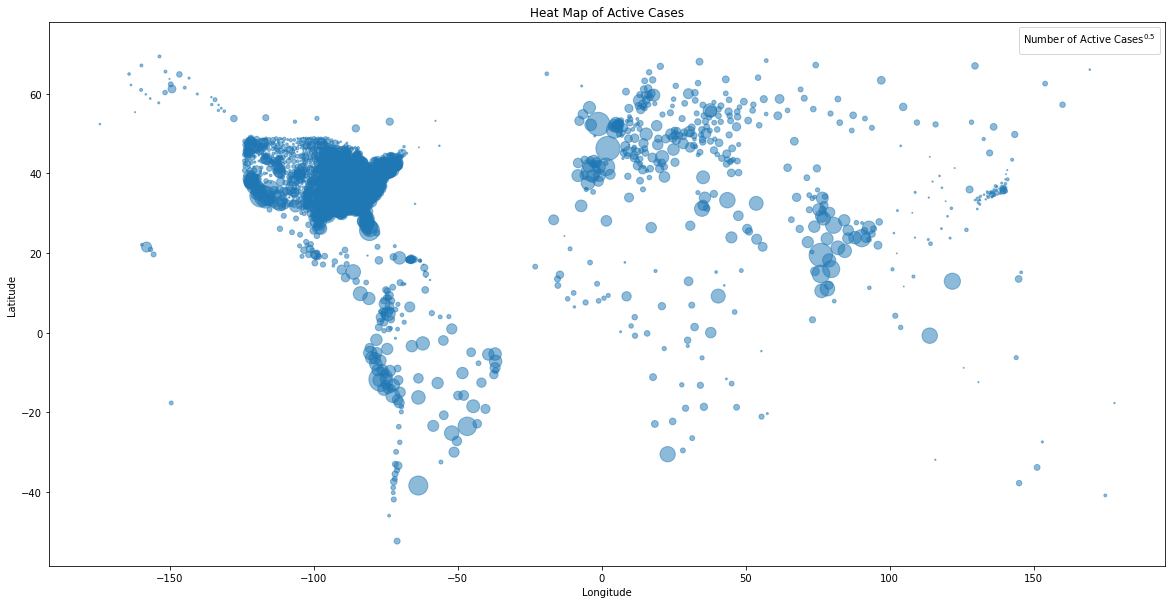

In [ ]:
import matplotlib.pyplot as plt
import os.path
plt.figure(figsize=(20,10))
plt.title('Heat Map of Active Cases')
scatter_sizes = location_data['Active']**.5
scatter_generator = plt.scatter(x = location_data['Long_'], y = location_data['Lat'], s = scatter_sizes, alpha = 0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(*scatter_generator.legend_elements('sizes', 5),title='Number of Active Cases$^{0.5}$')
if os.path.exists('../plots') == False:
  os.makedirs('../plots')
plt.savefig('../plots/WorldHeatMap')


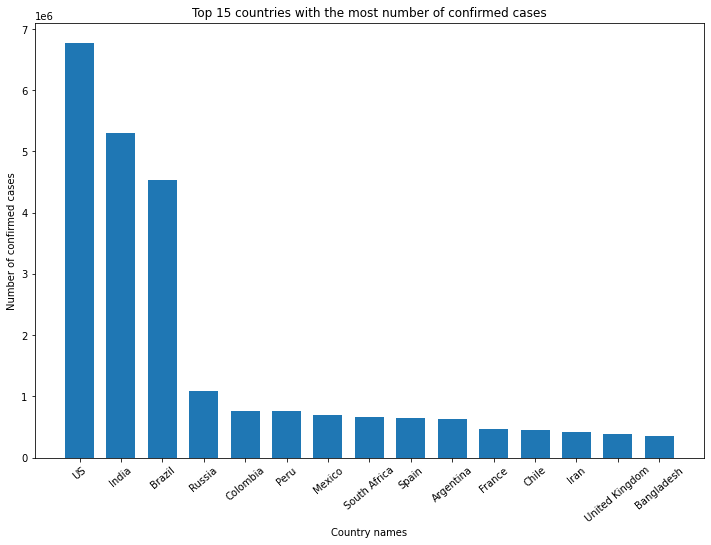

In [ ]:
country_total = location_data.groupby(by='Country_Region').sum()
confirmed_total = country_total.sort_values(by='Confirmed', ascending = False).head(15).reset_index()
plt.figure(figsize=(12,8))
plt.title('Top 15 countries with the most number of confirmed cases')
plt.bar( x=confirmed_total['Country_Region'], height=confirmed_total['Confirmed'],width=0.7)
plt.xticks(rotation=40)
plt.ylabel('Number of confirmed cases')
plt.xlabel('Country names')
plt.savefig('../plots/MostCases')

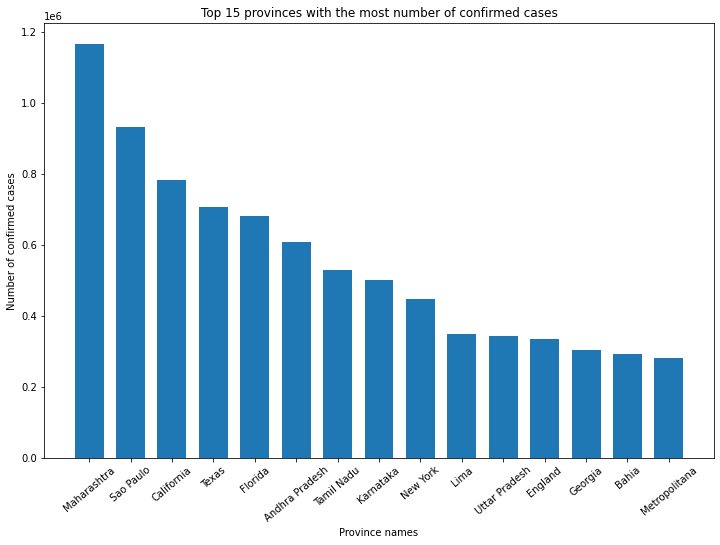

In [ ]:
province_total = location_data.groupby(by='Province_State').sum()
confirmed_total = province_total.sort_values(by='Confirmed', ascending=False).head(15).reset_index()
plt.figure(figsize=(12,8))
plt.title('Top 15 provinces with the most number of confirmed cases')
plt.bar(x=confirmed_total['Province_State'], height=confirmed_total['Confirmed'],width=0.7)
plt.xticks(rotation=40)
plt.ylabel('Number of confirmed cases')
plt.xlabel('Province names')
plt.savefig('../plots/MostCasesForProvince')

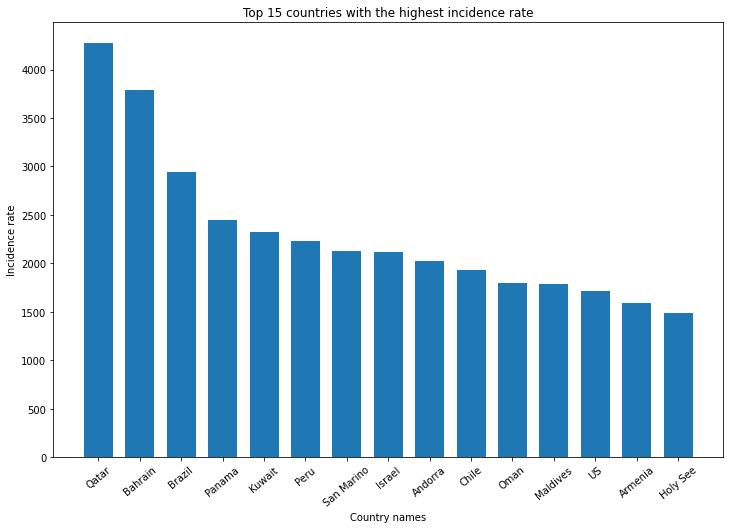

In [ ]:
country_total = location_data.groupby(by='Country_Region').mean()
incidence_rate = country_total.sort_values(by='Incidence_Rate', ascending=False).head(15).reset_index()
plt.figure(figsize=(12,8))
plt.bar(x=incidence_rate['Country_Region'], height=incidence_rate['Incidence_Rate'],width=0.7)
plt.xticks(rotation=40)
plt.ylabel('Incidence rate')
plt.xlabel('Country names')
plt.title('Top 15 countries with the highest incidence rate')
plt.savefig('../plots/IncidenceRate')

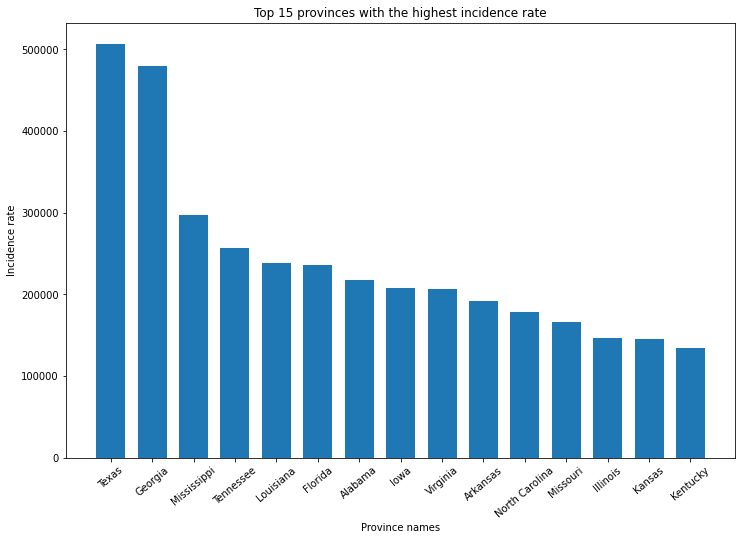

In [ ]:
province_total = location_data.groupby(by='Province_State').sum()
incidence_rate = province_total.sort_values(by='Incidence_Rate', ascending=False).head(15).reset_index()
plt.figure(figsize=(12,8))
plt.title('Top 15 provinces with the highest incidence rate')
plt.bar(x=incidence_rate['Province_State'], height=incidence_rate['Incidence_Rate'],width=0.7)
plt.xticks(rotation=40)
plt.ylabel('Incidence rate')
plt.xlabel('Province names')
plt.savefig('../plots/IncidenceRateForProvince')

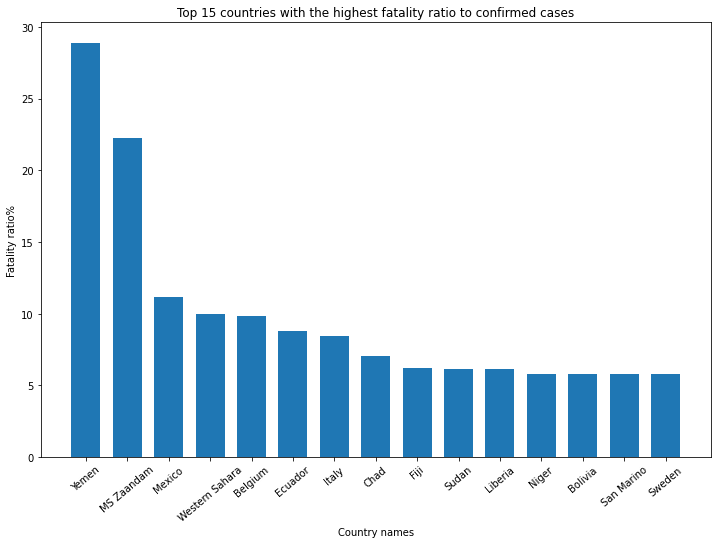

In [ ]:
country_total = location_data.groupby(by='Country_Region').mean()
fat_rate = country_total.sort_values(by='Case-Fatality_Ratio', ascending=False).head(15).reset_index()
plt.figure(figsize=(12,8))
plt.bar(x=fat_rate['Country_Region'], height=fat_rate['Case-Fatality_Ratio'],width=0.7)
plt.xticks(rotation=40)
plt.ylabel('Fatality ratio%')
plt.xlabel('Country names')
plt.title('Top 15 countries with the highest fatality ratio to confirmed cases')
plt.savefig('../plots/FatalityRate')

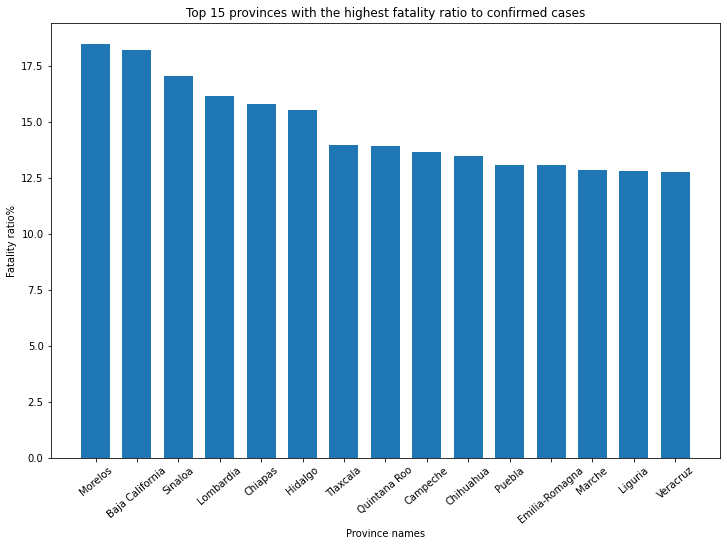

In [ ]:
province_total = location_data.groupby(by='Province_State').mean()
fat_rate = province_total.sort_values(by='Case-Fatality_Ratio', ascending=False).head(15).reset_index()
plt.figure(figsize=(12,8))
plt.bar(x=fat_rate['Province_State'], height=fat_rate['Case-Fatality_Ratio'],width=0.7)
plt.xticks(rotation=40)
plt.ylabel('Fatality ratio%')
plt.xlabel('Province names')
plt.title('Top 15 provinces with the highest fatality ratio to confirmed cases')
plt.savefig('../plots/FatalityRateForProvince')

<Figure size 864x576 with 0 Axes>

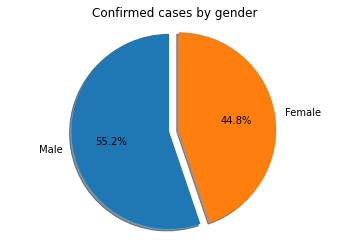

In [ ]:
plt.figure(figsize=(12,8))
labels = 'Male', 'Female'
explode = (0, 0.1) 
individual_data['sex'].value_counts()
sizes=individual_data['sex'].value_counts().tolist()
explode = (0, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Confirmed cases by gender')
fig1.savefig('../plots/GenderPieChart')


,age,sex,province,country,latitude,longitude,date_confirmation,additional_information,source,outcome,Last_Update,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,NaN,NaN,Delhi,India,28.614740,77.20910,26.05.2020,NaN,https://twitter.com/CMODelhi/status/1265203060...,recovered,2020-09-20 04:22:56,238828,4907,201671,32250.0,"Delhi, India",1276.409575,2.054617
1,NaN,NaN,Delhi,India,28.614740,77.20910,24.05.2020,NaN,https://t.me/indiacovid/5444,recovered,2020-09-20 04:22:56,238828,4907,201671,32250.0,"Delhi, India",1276.409575,2.054617
2,NaN,NaN,Delhi,India,28.614740,77.20910,31.05.2020,NaN,https://twitter.com/CMODelhi/status/1267076719...,recovered,2020-09-20 04:22:56,238828,4907,201671,32250.0,"Delhi, India",1276.409575,2.054617
3,NaN,NaN,Delhi,India,28.614740,77.20910,03.04.2020,NaN,https://twitter.com/ANI/status/124603857869975...,hospitalized,2020-09-20 04:22:56,238828,4907,201671,32250.0,"Delhi, India",1276.409575,2.054617
4,NaN,NaN,Delhi,India,28.614740,77.20910,23.04.2020,NaN,https://twitter.com/CMODelhi/status/1253345233...,hospitalized,2020-09-20 04:22:56,238828,4907,201671,32250.0,"Delhi, India",1276.409575,2.054617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305941,NaN,NaN,NaN,Central African Republic,6.582686,20.48899,22.03.2020,NaN,https://www.who.int/docs/default-source/corona...,nonhospitalized,2020-09-20 04:22:56,4786,62,1830,2894.0,Central African Republic,99.093869,1.295445
305942,30-39,female,Ehime,Japan,33.883710,132.79370,04.03.2020,#263,https://www.mhlw.go.jp/content/10906000/000604...,nonhospitalized,2020-09-20 04:22:56,114,6,108,0.0,"Ehime, Japan",8.512449,5.263158
305943,NaN,NaN,Tibet,China,31.761170,88.04576,01.02.2020,NaN,https://bnonews.com/index.php/2020/01/the-late...,nonhospitalized,2020-09-20 04:22:56,1,0,1,0.0,"Tibet, China",0.029070,0.000000
305944,40-49,female,Yamaguchi,Japan,34.201680,131.57320,05.03.2020,asypmtomatic,https://www.mhlw.go.jp/content/10906000/000604...,nonhospitalized,2020-09-20 04:22:56,195,1,171,23.0,"Yamaguchi, Japan",14.355800,0.512821


# You add your milestone 2 code below here.